### 이미지 데이터셋 만들기

In [ ]:
import os                             # 구글 드라이브에 연결
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# img dataset
from glob import glob
from PIL import Image
import cv2

folder_path = "/content/gdrive/MyDrive/빅데이터와 인공지능/image_dataset"
px = 128 # 픽셀크기

In [ ]:
import numpy as np

X = []
y = []
img_labels = []

for file_name in os.listdir(f"{folder_path}"):                  # file path
  # print(file_name)
  img_labels.append(str(file_name.replace(".jpg","")))
  file_path = '/'.join([folder_path, file_name])
  img = cv2.imread(file_path, cv2.IMREAD_COLOR )               # 이미지 읽기
  # IMREAD_COLOR : 컬러 / IMREAD_GRAYSCALE : 흑백 /IMREAD_UNCHANGED : 원본 이미지 사용
  # img = img.reshape(px,px,1)
  print("image shape:",img.shape, file_name)
  X.append(img)

  images = np.array(X)

image shape: (128, 128, 3) 겹벚꽃4.jpg
image shape: (128, 128, 3) 겹벚꽃3.jpg
image shape: (128, 128, 3) 겹벚꽃2.jpg
image shape: (128, 128, 3) 겹벚꽃1.jpg
image shape: (128, 128, 3) 겹벚꽃5.jpg
image shape: (128, 128, 3) 벚꽃1.jpg
image shape: (128, 128, 3) 벚꽃2.png
image shape: (128, 128, 3) 벚꽃3.jpg
image shape: (128, 128, 3) 벚꽃4.jpg
image shape: (128, 128, 3) 벚꽃5.jpg


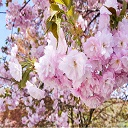

In [ ]:
#최상단에 import 를 추가한다.
from google.colab.patches import cv2_imshow

#cv2.imshow 함수를 cv2_imshow로 변경한다.
img2 = "/content/gdrive/MyDrive/빅데이터와 인공지능/image_dataset/벛꽃1.jpg"
cv2_imshow(img)

### 웹 크롤링 : 멜론 아이유 노래 가사

In [ ]:
!pip3 install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt install chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,343 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,158 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,681 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,046 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/pp

In [ ]:
! cp /usr/lib/chromium-browser/chromedriver /usr/bin

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import urllib
from urllib import request, parse
from urllib.request import urlopen
from urllib.parse import quote


In [ ]:
# 가수 이름으로 모든 노래 가사 검색
name = '레드벨벳'
query = urllib.parse.quote(name) # 한글을 아스키코드 형식의 URL 인코딩으로 변환

# url : 멜론
url = "https://www.melon.com/search/lyric/index.htm?q="+query+"&section=&searchGnbYn=Y&kkoSpl=Y&kkoDpType=&mwkLogType=T"

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', options = options)
driver.get(url)

print(driver) # 실행 확인

WebDriverException: ignored

In [ ]:
lyric = driver.find_element(By.XPATH,'//*[@id="pageList"]/div/ul/li[2]/dl/dd[1]/a').text
print(lyric)

In [ ]:
# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.pWvX87ugCg/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.AJGCxI5Amn/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.W7vQozCxP0/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [ ]:
# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

WebDriverException: ignored

In [ ]:
#해당 url로 이동
url = "https://www.naver.com/"
driver.get(url)